# Stable Diffusion
https://en.wikipedia.org/wiki/Stable_Diffusion

### Stable Diffusion Huggingface
https://huggingface.co/spaces/stabilityai/stable-diffusion

### Waifu Diffusion Huggingface
https://huggingface.co/hakurei/waifu-diffusion

### Prompts guide
https://www.reddit.com/r/WaifuDiffusion/comments/xudcdp/prompts_guide_by_cdcruz/

In [ ]:
try:
    import diffusers
except:
    !pip install -q transformers=4.25.1
    !pip install -q accelerate=0.15.0
    !pip install -q diffusers=0.11.1
    import diffusers

import torch
import matplotlib.pyplot as plt
import numpy as np
import time

if torch.cuda.is_available():
    device_name = torch.device("cuda")
else:
    device_name = torch.device("cpu")

print("Using {}.".format(device_name))

In [ ]:
# Load diffuser pipeline.
def load_pipeline(model_dir, device_name):
    pipe = diffusers.StableDiffusionPipeline.from_pretrained(model_dir, torch_dtype = torch.float32)

    #pipe.scheduler = diffusers.EulerDiscreteScheduler.from_config(pipe.scheduler.config)
    pipe.scheduler = diffusers.EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

    pipe.safety_checker = lambda images, **kwargs: [images, [False] * len(images)]
    pipe = pipe.to(device_name)
    return pipe

In [ ]:
# Run diffuser pipeline.
def run_pipe(pipe, prompt, negative_prompt = None, 
             steps = 60, width = 512, height = 704, 
             scale = 8.0, seed = 123, n_images = 1):
    gen = torch.Generator(device = device_name).manual_seed(seed)
    image_list = []
    with torch.autocast("cuda"): 
        for i in range(n_images): 
            image = pipe(prompt, height = height, width = width, 
                         num_inference_steps = steps, guidance_scale = scale,
                        negative_prompt = negative_prompt, generator = gen)
            image_list.append(image)
    return image_list

In [ ]:
# Plot pipeline outputs.
def plot_images(images, labels = None):
    N = len(images)
    n_cols = 5
    n_rows = int(np.ceil(N / n_cols))

    plt.figure(figsize = (20, 5 * n_rows))
    for i in range(len(images)):
        plt.subplot(n_rows, n_cols, i + 1)
        if labels is not None:
            plt.title(labels[i])
        plt.imshow(np.array(images[i].images[0]))
        plt.axis(False)
    plt.show()

In [ ]:
# Load model from huggingface.
#model_dir = "stabilityai/stable-diffusion-2"
model_dir = "hakurei/waifu-diffusion"

pipe = load_pipeline(model_dir, device_name)

## Anime Trial 1

In [ ]:
prompt_0 = """((masterpiece)),(best quality),(8k),(beautiful detailed face),photorealistic,
(perfect anatomy),(1girl),solo,long hair,(white bikini),(large breasts),spreading legs,
(pleasured expression),slim,thin waist,(mature woman),perfect face,(cleavage)"""

negative_prompt = """(worst quality),(low quality),medium quality,deleted,lowres,cartoon,3d,comic,
(bad anatomy),bad hands,text,error,(deformed),(blurry),missing fingers,extra digit,fewer digits,
(disfigured),(poorly drawn face),mutation,mutated,extra limb,ugly,poorly drawn hands,two heads,
child,kid,gross,mutilated,disgusting,horrible,scary,evil,old,conjoined"""

images_0 = run_pipe(pipe, prompt_0, negative_prompt, steps = 60, width = 512, height = 704, scale = 8.0, seed = 123, n_images = 1)

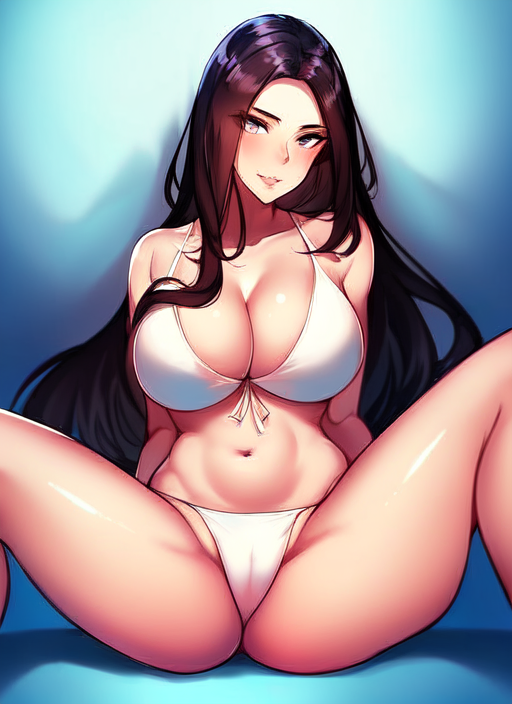

In [80]:
[display(i.images[0]) for i in images_0];

In [72]:
images_00 = run_pipe(pipe, prompt_0, negative_prompt, steps = 60, width = 512, height = 704, scale = 8.0, seed = 1029384756, n_images = 1)

  0%|          | 0/60 [00:00<?, ?it/s]

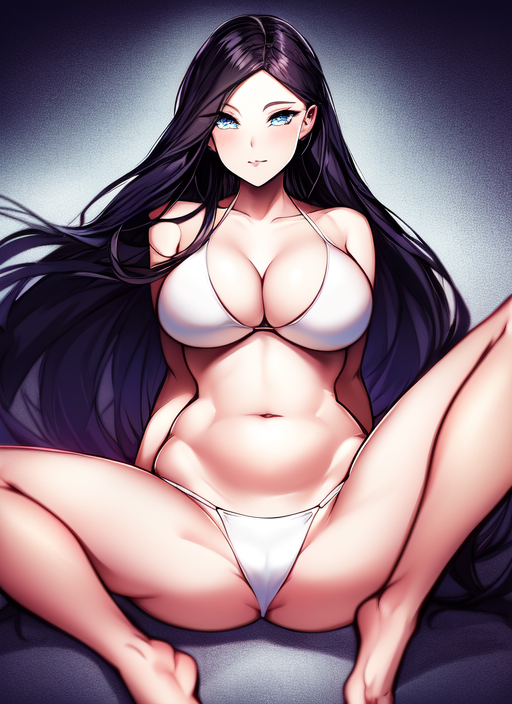

In [81]:
[display(i.images[0]) for i in images_00];

### Anime Trial 1 - Steps

In [88]:
#steps = [60, 100, 200, 500, 1000]
#images_0_steps = []
#for s in steps:
#    images_0_steps += run_pipe(pipe, prompt_0, negative_prompt, steps = s, width = 512, height = 704, scale = 8.0, seed = 1029384756, n_images = 1)

In [87]:
#plot_images(images_0_steps, steps)

### Anime Trial 1 - Scale

In [85]:
scales = [2**i for i in range(1, 5 + 1, 1)]
images_0_scales = []
for s in scales:
    images_0_scales += run_pipe(pipe, prompt_0, negative_prompt, steps = 60, width = 512, height = 704, scale = s, seed = 1029384756, n_images = 1)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

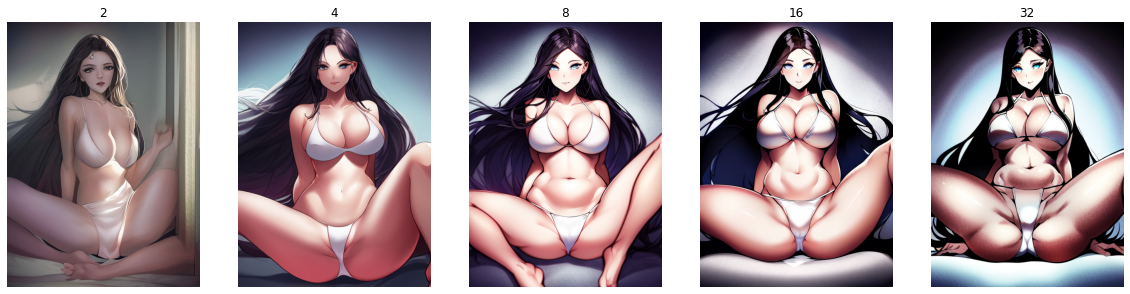

In [86]:
plot_images(images_0_scales, scales)

### Anime Trial 1 - Seed

In [83]:
#seeds = [10**i for i in range(10)]
seeds = [1029384756, 1029384755, 1029384757, 1029384746, 1029384766, 1029384656, 1029384856, 1029383756, 1029385756, 1029374756, 1029394756]
images_0_seeds = []
for s in seeds:
    images_0_seeds += run_pipe(pipe, prompt_0, negative_prompt, steps = 60, width = 512, height = 704, scale = 8.0, seed = s, n_images = 1)

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

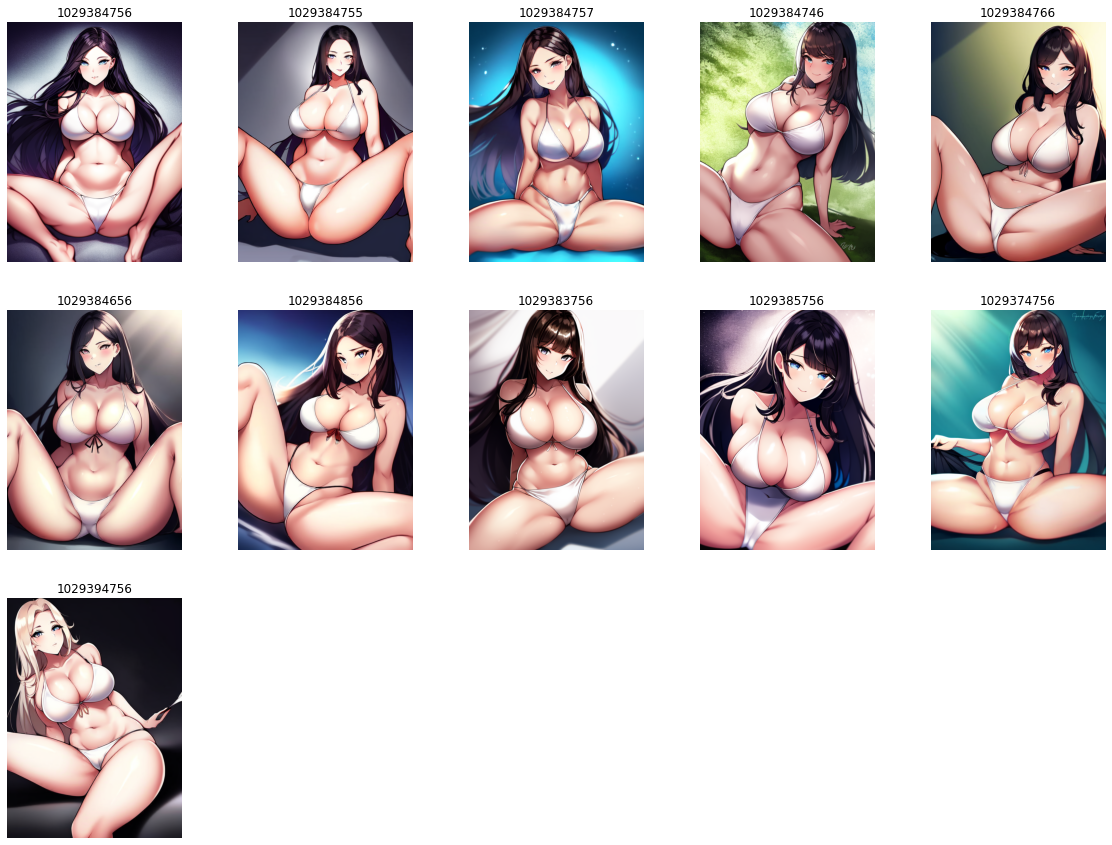

In [84]:
plot_images(images_0_seeds, seeds)

## Anime 2

In [89]:
images_1 = run_pipe(pipe, prompt_0, negative_prompt, steps = 60, width = 600, height = 800, scale = 8.0, seed = 1029384756, n_images = 1)

  0%|          | 0/60 [00:00<?, ?it/s]

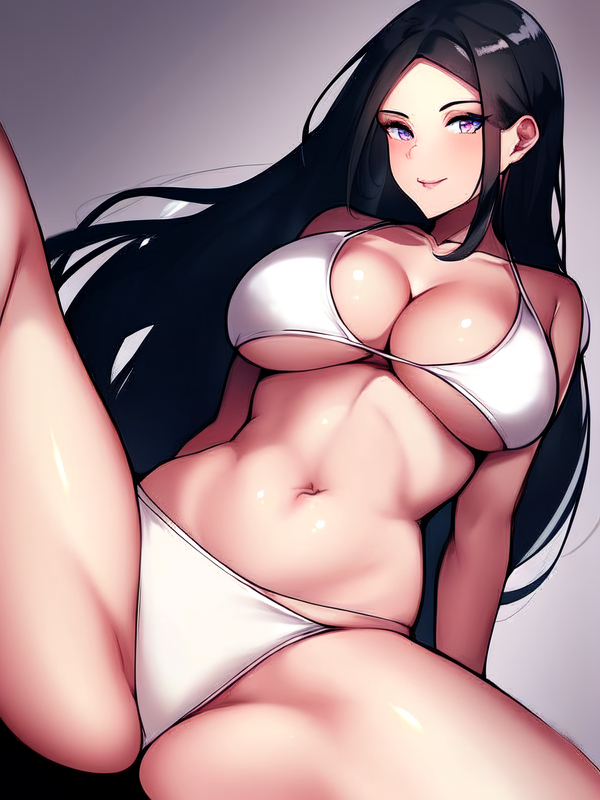

In [90]:
[display(i.images[0]) for i in images_1];